In [1]:
# Libraries import
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector, Operator
import matplotlib.pyplot as plt
from qiskit.quantum_info import DensityMatrix
import numpy as np
import qiskit

C:\Users\giova\AppData\Local\Temp\ipykernel_27400\2950140104.py:35: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(1).c_if(0, 1)
C:\Users\giova\AppData\Local\Temp\ipykernel_27400\2950140104.py:48: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.h(1).c_if(0, 0)
C:\Users\giova\AppData\Local\Temp\ipykernel_27400\2950140104.py:58: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.cx(0, 1).c_if(0, 1)
C:\Users\giova\AppData\Local\Temp\ipykernel_27400\2950140104.py:72: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.measure([0, 1], [temp[0], temp[1]]).c_if(0, 0)


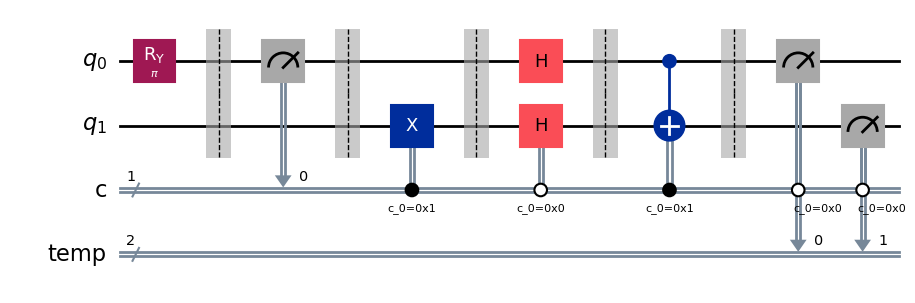

In [2]:
import numpy as np
import qiskit


# Get Qiskit version
qiskit_version = qiskit.version.get_version_info()


def specialized_werner_states_generator(theta: float) -> QuantumCircuit:
    """
    A specialized circuit for generating Werner states with a given parameter theta.

    Args:
        theta: The parameter theta for the Werner state (in radians).
    
    Returns:
        A QuantumCircuit that generates the Werner state.
    """

    # Create a quantum circuit with 2 qubits and 1 classical bit
    qc = QuantumCircuit(QuantumRegister(2, "q"), ClassicalRegister(1, "c"))

    # Apply the R_y(theta) gate to the first qubit
    qc.ry(theta, 0)

    qc.barrier()

    # Measure the first qubit
    qc.measure(0, 0)

    qc.barrier()

    # Apply X gate on the second qubit if the measurement outcome is 1
    if int(qiskit_version.split('.')[0]) < 2:
        qc.x(1).c_if(0, 1)
    else:
        # From Qiskit 2.0.0.
        with qc.if_test((0, 1)):
            qc.x(1)

    qc.barrier()

    # Apply Hadamard gate on the first qubit
    qc.h(0)

    # Apply Hadamard gate on the second qubit if the measurement outcome is 0
    if int(qiskit_version.split('.')[0]) < 2:
        qc.h(1).c_if(0, 0)
    else:
        # From Qiskit 2.0.0.
        with qc.if_test((0, 0)):
            qc.h(1)

    qc.barrier()

    # Apply CNOT gate if the measurement outcome is 1
    if int(qiskit_version.split('.')[0]) < 2:
        qc.cx(0, 1).c_if(0, 1)
    else: 
        # From Qiskit 2.0.0.
        with qc.if_test((0, 1)):
            qc.cx(0, 1)

    qc.barrier()

    # Measure both qubits if the previous measurement outcome is 0
    # We do not want to preserve the results of these measurements.
    # So we create a new classical register with 2 bits, called "temp"
    temp = ClassicalRegister(2, "temp")
    qc.add_register(temp)
    if int(qiskit_version.split('.')[0]) < 2:
        qc.measure([0, 1], [temp[0], temp[1]]).c_if(0, 0)
    else:
        # From Qiskit 2.0.0.
        with qc.if_test((0, 0)):
            qc.measure([0, 1], [temp[0], temp[1]])

    return qc



qc = specialized_werner_states_generator(np.pi)
# draw the circuit
qc.draw('mpl')
    